# Local Outlier Factor (LOF)


Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

## Algorithm
Let k-distance(A) be the distance of the object A to the k-th nearest neighbor. We denote the set of k nearest neighbors as Nk(A). We then define the reachability result as:

reachability-distancek(A,B)=max { k-distance(B), d(A,B) }

The reachability distance of an object A from B is the true distance of the two objects, but at least the k-distance of B. Objects that belong to the k nearest neighbors of B (the "core" of B, see DBSCAN cluster analysis) are considered to be equally distant. The reason for this distance is to get more stable results.

The local reachability density of an object A is defined by the inverse of the average reachability distance of the object A from its neighbors. Note that it is not the average reachability of the neighbors from A (which by definition would be the k-distance(A)), but the distance at which A can be "reached" from its neighbors.

The local reachability densities are then compared with those of the neighbors using $LOF_k(A)$, the average local reachability density of the neighbors divided by the object's own local reachability density. 

- LOF(k) ~ 1 means Similar density as neighbors,

- LOF(k) < 1 means Higher density than neighbors (Inlier),

- LOF(k) > 1 means Lower density than neighbors (Outlier)



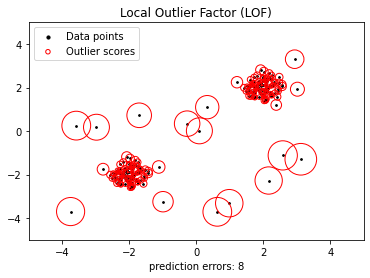

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()